<a href="https://colab.research.google.com/github/Vivekdesai25/Machine-Learning-Practice/blob/main/LocalOutlierFactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of outliers detected : 26
    X  Y  month  day  FFMC   DMC     DC   ISI  temp  RH  wind  rain  area  \
12  6  5      1    0  63.5  70.8  665.3   0.8  17.0  72   6.7   0.0   0.0   
22  7  4      6    3  94.3  96.3  200.0  56.1  21.0  44   4.5   0.0   0.0   
75  9  9      3    4  84.2   6.8   26.6   7.7   6.7  79   3.1   0.0   0.0   
76  9  9      3    0  86.6  13.2   43.0   5.3  15.7  43   3.1   0.0   0.0   
97  3  4      7    2  69.0   2.4   15.5   0.7  17.4  24   5.4   0.0   0.0   

    outlier  
12       -1  
22       -1  
75       -1  
76       -1  
97       -1  


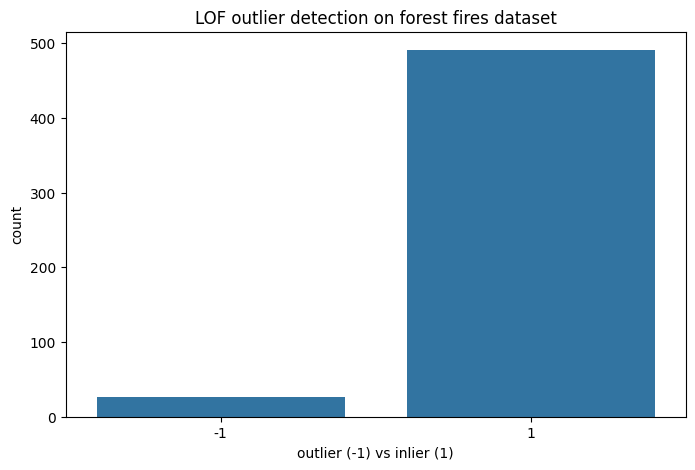

In [3]:
import pandas as pd
data = ("/content/forestfires(1).csv")
df = pd.read_csv(data)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['month'] = le.fit_transform(df['month'])
df['day'] = le.fit_transform(df['day'])

X = df.drop(columns=['area'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination = 0.05)
outlier_labels = lof.fit_predict(X_scaled)

df['outlier'] = outlier_labels

print("Number of outliers detected :", sum(outlier_labels == -1))
print(df[df['outlier'] == -1].head())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='outlier', data=df)
plt.title("LOF outlier detection on forest fires dataset")
plt.xlabel("outlier (-1) vs inlier (1)")
plt.show()